In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [40]:
# Specify the path to your .npy file
train_file_path = 'fashion_train.npy'
test_file_path = 'fashion_test.npy'

# Load the data from the .npy file
train_data = np.load(train_file_path)
test_data = np.load(test_file_path)
print(train_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [41]:
#convert it to a dataframe
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
# print the first 5 items
print(train_df.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    0    0    0    0    0    3    0    0    0   41  ...   63   78   11    0   
1    0    0    0    0    0    0    0    0    0    0  ...   32    0    0    0   
2    0    0    0    0    0    1    1    0    0    0  ...  168  119    0    0   
3    0    0    0    0    0    0    0    0    0   98  ...   21    0    0    0   
4    0    0    0    0    0    0    0    2    0    0  ...   88  128   46    0   

   779  780  781  782  783  784  
0    2    0    0    0    0    0  
1    0    0    0    0    0    1  
2    0    0    0    0    0    0  
3    0    0    0    0    0    3  
4    0    0    0    0    0    4  

[5 rows x 785 columns]


In [42]:
# get the number of rows
num_rows = train_df.shape[0]
print(num_rows)

10000


In [43]:
# Extract the last column
last_column = train_data[:, -1]

In [44]:
# Initialize counts
count_0_tshirt = 0
count_1_trousers = 0
count_2_pull_over = 0
count_3_dress = 0
count_4_shirt = 0



# Loop through the last column
for value in last_column:
    if value == 0:
        count_0_tshirt += 1
    elif value == 1:
        count_1_trousers += 1
    elif value == 2:
        count_2_pull_over += 1
    elif value == 3:
        count_3_dress += 1
    elif value == 4:
        count_4_shirt += 1

# Display the counts
print("Count of 0s:", count_0_tshirt)
print("Count of 1s:", count_1_trousers)
print("Count of 2s:", count_2_pull_over)
print("Count of 3s:", count_3_dress)
print("Count of 4s:", count_4_shirt)

Count of 0s: 2033
Count of 1s: 1947
Count of 2s: 2001
Count of 3s: 2005
Count of 4s: 2014


In [45]:
# Get the simple probabilities


P_tshirt = count_0_tshirt / num_rows
P_trouser = count_1_trousers / num_rows
P_pull_over = count_2_pull_over/ num_rows
P_dress = count_3_dress / num_rows
P_shirt = count_4_shirt / num_rows

print(f" P(T-shirt) = {P_tshirt}")
print(f" P(Trousers) = {P_trouser}")
print(f" P(Pull Over) = {P_pull_over}")
print(f" P(Dress) = {P_dress}")
print(f" P(Shirt) = {P_shirt}")

 P(T-shirt) = 0.2033
 P(Trousers) = 0.1947
 P(Pull Over) = 0.2001
 P(Dress) = 0.2005
 P(Shirt) = 0.2014


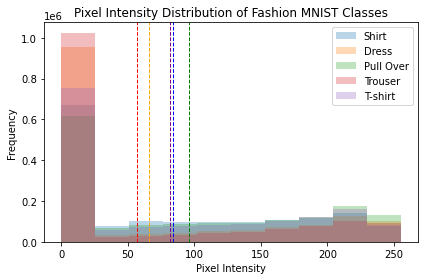

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [73]:
#get list of
t_shirt_list = []
trouser_list = []
pull_over_list = []
dress_list = []
shirt_list = []

#create subset of data with the different classes
for i in range(len(train_data)):
    if train_data[i][-1] == 0:
        t_shirt_list.append(train_data[i])
    elif train_data[i][-1] == 1:
        trouser_list.append(train_data[i])
    elif train_data[i][-1] == 2:
        pull_over_list.append(train_data[i])
    elif train_data[i][-1] == 3:
        dress_list.append(train_data[i])
    elif train_data[i][-1] == 4:
        shirt_list.append(train_data[i])

mu0_tshirts = np.mean(t_shirt_list)
mu1_trousers = np.mean(trouser_list)
mu2_pull_over = np.mean(pull_over_list)
mu3_dress = np.mean(dress_list)
mu4_shirt = np.mean(shirt_list)
concatenated_tshirt = np.concatenate(t_shirt_list)
concatenated_trouser = np.concatenate(trouser_list)
concatenated_pull_over = np.concatenate(pull_over_list)
concatenated_dress = np.concatenate(dress_list)
concatenated_shirt = np.concatenate(shirt_list)

#plot all the histograms on top of eachother
#plt.hist(concatenated_shirt)
#plt.hist(concatenated_dress)
#plt.hist(concatenated_pull_over)
#plt.hist(concatenated_trouser)
#plt.hist(concatenated_tshirt)
#add transparency
plt.hist(concatenated_shirt, alpha = 0.3)
plt.hist(concatenated_dress, alpha = 0.3)
plt.hist(concatenated_pull_over, alpha = 0.3)
plt.hist(concatenated_trouser, alpha = 0.3)
plt.hist(concatenated_tshirt, alpha = 0.3)
plt.legend(['Shirt', 'Dress', 'Pull Over', 'Trouser', 'T-shirt'])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Fashion MNIST Classes')
#add mu lines
plt.axvline(mu0_tshirts, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(mu1_trousers, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu2_pull_over, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mu3_dress, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mu4_shirt, color='blue', linestyle='dashed', linewidth=1)

#separate the histograms better
plt.tight_layout()


plt.show()
#print(np.mean(t_shirt_list))
#plot in histogram

#get SW (within class scatter matrix)
#get S0, S1, S2, S3, S4
#do it with a for lopo

temp_t_list = []

for i in range(len(t_shirt_list)):
    temp_t_list.append(t_shirt_list[i] - mu0_tshirts)

print(temp_t_list)
    #S0 = np.dot((t_shirt_list[i] - mu0_tshirts), (t_shirt_list[i] - mu0_tshirts).T)

#for i in range(len(trouser_list)):
 #   S1 = np.dot((trouser_list[i] - mu1_trousers), (trouser_list[i] - mu1_trousers).T)
#for i in range(len(pull_over_list)):
 #   S2 = np.dot((pull_over_list[i] - mu2_pull_over), (pull_over_list[i] - mu2_pull_over).T)
#for i in range(len(dress_list)):
 #   S3 = np.dot((dress_list[i] - mu3_dress), (dress_list[i] - mu3_dress).T)
#for i in range(len(shirt_list)):
 #   S4 = np.dot((shirt_list[i] - mu4_shirt), (shirt_list[i] - mu4_shirt).T)
#print(S0)



In [76]:
temp_t_list = []
for i in range(len(t_shirt_list)):
    temp_t_list.append(t_shirt_list[i] - mu0_tshirts)

print(temp_t_list)

TypeError: 'list' object cannot be interpreted as an integer